## A first neural network in Keras

### First step is to load data from file and plot a few examples

In [1]:
% matplotlib inline
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_x = pickle.load(open("MNIST_train_x.pkl", 'rb'))
train_y = pickle.load(open("MNIST_train_y.pkl", 'rb'))
test_x = pickle.load(open("MNIST_test_x.pkl", 'rb'))
test_y = pickle.load(open("MNIST_test_y.pkl", 'rb'))
print(type(train_x))
print(train_x.shape)
print(type(train_y))
print(train_y.shape)
print(type(test_x))
print(test_x.shape)
print(type(test_y))
print(test_y.shape)

# Creating subset of training data to speed up training
train_x_short = train_x[:20000]
train_y_short = train_y[:20000]

<class 'numpy.ndarray'>
(60000, 784)
<class 'numpy.ndarray'>
(60000, 10)
<class 'numpy.ndarray'>
(10000, 784)
<class 'numpy.ndarray'>
(10000, 10)


In [3]:
def plotExamples(data, labels):
    plt.figure(figsize=(8,5))
    for i in range(8):
        sub = 241 + i
        ax = plt.subplot(sub)
        index = np.random.randint(0, data.shape[0])
        ax.set_title("num: " + str(np.argmax(labels[index])))
        im = np.reshape(data[index], (28, 28))
        plt.imshow(im, cmap="gray")
    plt.show()

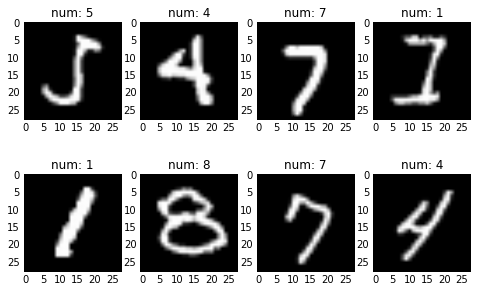

In [4]:
plotExamples(train_x, train_y)

### Building a first Keras model
- Simple 3 layer feedforward network
- Three steps: 
    - Build model
    - Compile model setting the optimizer and loss 
        - Note models can be recompiled without affecting the stored value of weights and biases. This means that if you want to change your learning rate or optimizer during training, you simply recompile and call model.fit again
    - Train the model by calling model.fit

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

Using Theano backend.


In [6]:
'''
First step is to initialize your model
Keras has two models 
    1. Sequential - easier to work with, suitable for most tasks
    2. Functional AP - useful for defining complex models
'''
model = Sequential()

'''Then, define your model architecture'''

'''
Add a fully connected hidden layer with 100 nodes. 
When you add your first layer, Keras implicitly adds the input layer, 
so you need to specify the dimension of your inputs
'''
model.add(Dense(100, input_dim=784))
'''Specify your activation function for this layer'''
model.add(Activation('sigmoid'))
'''Add an output layer with 10 output nodes'''
model.add(Dense(10))
'''Specify your activation function for this layer'''
model.add(Activation('sigmoid'))

'''
Next, compile your model. This defines two critical features
    1. Optimizer - how your model learns
    2. Loss function - how your model defines the error between
       the correct output and its prediction
Here you can also specify the metrics you want to use to evaluate your model's performance
'''
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

'''
Finally, train your model. 
To train, a model needs input data, and the corresponding correct outputs
You can also specify the batch size and number of training epochs
'''
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, verbose=2)

Epoch 1/10
0s - loss: 0.1036 - acc: 0.2407
Epoch 2/10
1s - loss: 0.0791 - acc: 0.4105
Epoch 3/10
1s - loss: 0.0721 - acc: 0.5293
Epoch 4/10
1s - loss: 0.0665 - acc: 0.5991
Epoch 5/10
0s - loss: 0.0618 - acc: 0.6475
Epoch 6/10
0s - loss: 0.0579 - acc: 0.6865
Epoch 7/10
0s - loss: 0.0545 - acc: 0.7188
Epoch 8/10
0s - loss: 0.0516 - acc: 0.7451
Epoch 9/10
0s - loss: 0.0492 - acc: 0.7629
Epoch 10/10
0s - loss: 0.0470 - acc: 0.7810


In [7]:
# Print model information
model.summary()
print()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 100)           78500       dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 100)           0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 10)            1010        activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 10)            0           dense_2[0][0]                    
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_____________________

### Example of recompiling a model
 - This allows you to change the settings of the optimizer and loss function if you wish, without affecting the values of the weights and biases
 - It can be useful for reducing the learning rate if your model performance has plateaued
 - This example also illustrates the validation_split option of the fit function. It holds out a specified proportion of your training data for evaluating model performance as it trains. 
     - This enables you to tune your hyperparameters and model architecture without polluting the test data

In [8]:
model = Sequential()
model.add(Dense(128, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('sigmoid'))

sgd = SGD(lr=0.1)
print("Learning rate is 0.1")
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=64, nb_epoch=10, verbose=2, validation_split=0.2)
print()
sgd = SGD(lr=0.01)
print("Learning rate is 0.01")
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=64, nb_epoch=10, verbose=2, validation_split=0.2)
print()
sgd = SGD(lr=0.001)
print("Learning rate is 0.001")
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=64, nb_epoch=10, verbose=2, validation_split=0.2)

Learning rate is 0.1
Train on 16000 samples, validate on 4000 samples
Epoch 1/10
1s - loss: 0.0834 - acc: 0.4290 - val_loss: 0.0656 - val_acc: 0.6180
Epoch 2/10
0s - loss: 0.0573 - acc: 0.7003 - val_loss: 0.0519 - val_acc: 0.7520
Epoch 3/10
0s - loss: 0.0462 - acc: 0.7901 - val_loss: 0.0433 - val_acc: 0.7993
Epoch 4/10
0s - loss: 0.0394 - acc: 0.8262 - val_loss: 0.0381 - val_acc: 0.8303
Epoch 5/10
0s - loss: 0.0349 - acc: 0.8493 - val_loss: 0.0341 - val_acc: 0.8488
Epoch 6/10
0s - loss: 0.0316 - acc: 0.8624 - val_loss: 0.0312 - val_acc: 0.8625
Epoch 7/10
0s - loss: 0.0289 - acc: 0.8742 - val_loss: 0.0290 - val_acc: 0.8730
Epoch 8/10
0s - loss: 0.0269 - acc: 0.8819 - val_loss: 0.0271 - val_acc: 0.8770
Epoch 9/10
0s - loss: 0.0253 - acc: 0.8882 - val_loss: 0.0258 - val_acc: 0.8812
Epoch 10/10
0s - loss: 0.0239 - acc: 0.8936 - val_loss: 0.0245 - val_acc: 0.8872

Learning rate is 0.01
Train on 16000 samples, validate on 4000 samples
Epoch 1/10
0s - loss: 0.0227 - acc: 0.9014 - val_loss: 0.

### Helper function to calculate model accuracy on the test data

In [9]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    num_correct = np.argmax(result, axis=1)==np.argmax(test_y, axis=1)
    accuracy = np.sum(num_correct) / result.shape[0]
    print("Accuracy on data is: {}%".format(accuracy * 100))

In [10]:
accuracy(test_x, test_y, model)

Accuracy on data is: 89.69%


### Plotting some examples the model got right and wrong

In [11]:
result = model.predict(test_x)
correct_indices = np.argmax(result, axis=1)==np.argmax(test_y, axis=1)
test_x_correct = test_x[correct_indices]
test_y_correct = test_y[correct_indices]
incorrect_indices = np.argmax(result, axis=1)!=np.argmax(test_y, axis=1)
test_x_incorrect = test_x[incorrect_indices]
test_y_incorrect = test_y[incorrect_indices]

(8969, 784)


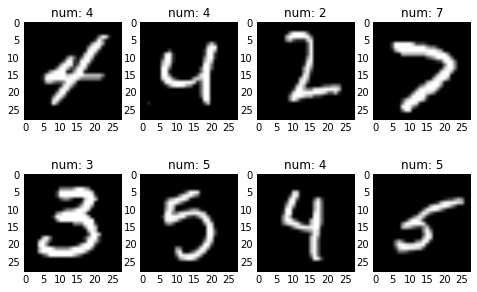

In [12]:
print(test_x_correct.shape)
plotExamples(test_x_correct, test_y_correct)

(1031, 784)


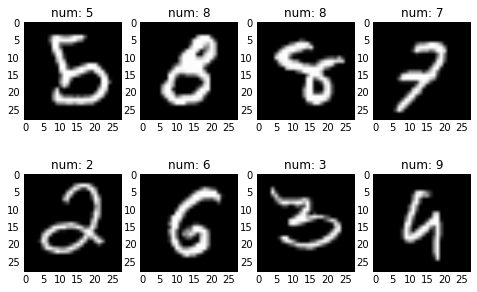

In [13]:
print(test_x_incorrect.shape)
plotExamples(test_x_incorrect, test_y_incorrect)